# Ricostruzione segnale SigmaDelta ADC
v2 version to read a .txt file acquired using the protocol acquisition from AD2.
The file read is SigmaDeltaADC.txt.

A.Gennai, CR

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


In [ ]:

# function used in the fit
# parameters: A, Amplitude
#             omega, omega
#             phi, phi ;-)
def sin_func(t, A, nu,phi,B):
    return A*np.sin(2*np.pi*nu*t + phi) + B



In [ ]:
# Add code to mount local drive to Colab 
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
#
# Reads the txt data
#
file_path = 'MyDrive/MyDrive/Colab Notebooks/SigmaDeltaADC.txt'
with open(file_path,newline='') as csvfile:
#convert csv removing comments and empty lines
#    fieldnames = ['Data']
    csvreader = csv.reader(csvfile)
#    reader = csv.DictReader(filter(lambda row: (row[0]!='#' and row[0]!='\n'), csvfile),fieldnames=fieldnames)
#    skip_header = next(reader);
#    data = list(csvreader);
    n=0;

    decimal_stream = np.array([elem for elem in csvreader]);
    print(decimal_stream.dtype);
    print(decimal_stream.shape[1]);
 #   my_range = decimal_shape[1]-1;
    bit_stream = np.zeros((decimal_stream.shape[1]-1)*8)
    for ind in range((decimal_stream.shape[1]-1)): 
#    for ind in range(3):
# a is string containing for each converted in binary but a[0] is the MSB  
# b contains the reversed array
      a = np.binary_repr(int(decimal_stream[0,ind]),width=8);
      b = a[::-1];
      for i in range(8):
        j=ind*8+i;
        bit_stream[j] = a[i];
#        print(i,j,bit_stream[j]);
#      print(decimal_stream[0,ind], a, b, a[0], b[0],  '\n');
  

<U4
1660


(200.0, 12000.0)

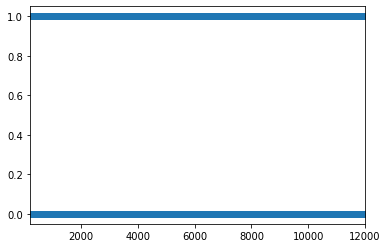

In [ ]:
# Plot
ind = np.arange(0,bit_stream.shape[0])
plt.scatter(ind,bit_stream)
#np.set_printoptions(threshold=np.inf)
#print(bit_stream)
plt.xlim(200,12000)

(0.0, 2000.0)

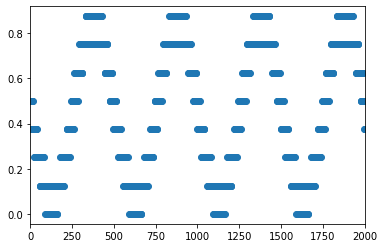

In [ ]:
# Calculate moving average on 8 time periods
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
#
bit_stream_mov = moving_average(bit_stream,8)
ind = np.arange(bit_stream_mov.shape[0])
plt.scatter(ind,bit_stream_mov)
plt.xlim(0,2000)


(0.0, 2000.0)

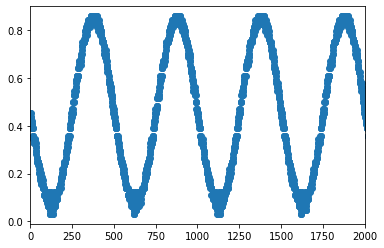

In [ ]:
# again moving average
bit_stream_mov1 = moving_average(bit_stream_mov,8)
ind = np.arange(bit_stream_mov1.shape[0])
plt.scatter(ind,bit_stream_mov1)
plt.xlim(0.0,2000)